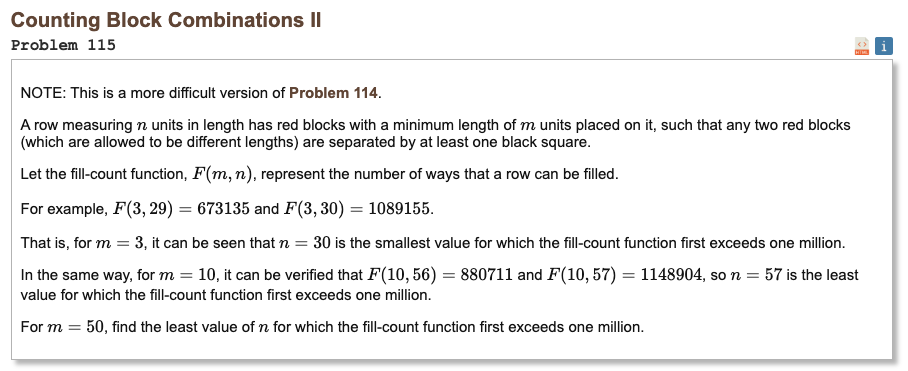

## Initial approach

* Lets remember solution for Problem 114:

```python
def count_ways(n):
    dp = [0]*(n+1)
    pref = [0]*(n+1)
    dp[0] = 1
    pref[0] = 1
    for i in range(1, n+1):
        val = dp[i-1]
        if i >= 3:
            val += 1
        if i >= 4:
            val += pref[i-4]
        dp[i] = val
        pref[i] = pref[i-1] + dp[i]
    return dp[n]

print("Result:", count_ways(7))
````

* In this problem, red blokcs must not be at least 3 units long,
* they must be m units long.
* to handle the problem with previous solution, we need to add m parameter to `count_ways` function

In [1]:
def count_ways_with_min_block(n, m):
    dp = [0]*(n+1)
    pref = [0]*(n+1)
    dp[0] = 1
    pref[0] = 1
    for i in range(1, n+1):
        val = dp[i-1]
        if i >= m:
            val += 1
        if i >= m+1:
            val += pref[i-m-1]
        dp[i] = val
        pref[i] = pref[i-1] + dp[i]
    return dp[n]

def find_min_n_exceed(limit, m):
    n = 0
    dp = [1]
    pref = [1]
    while True:
        n += 1
        val = dp[n-1]
        if n >= m:
            val += 1
        if n >= m+1:
            val += pref[n-m-1]
        dp.append(val)
        pref.append(pref[-1] + val)
        if val > limit:
            return n, val

In [2]:
%%time

n, ways = find_min_n_exceed(1_000_000, 50)
print(f"{n} is the smallest value for which the fill-count function first exceeds one million (result: {ways})")

168 is the smallest value for which the fill-count function first exceeds one million (result: 1053389)
CPU times: user 150 μs, sys: 33 μs, total: 183 μs
Wall time: 204 μs
